In [ ]:
!pip install numpy pandas matplotlib tensorflow scikit-learn

In [2]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
     ------------------------------------ 272.8/272.8 MB 412.6 kB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 759.3 kB/s eta 0:00:00
     -------------------------------------- 440.7/440.7 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 755.4 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 516.6 kB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 957.5 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------ 


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# Load the stock price data
df = pd.read_csv('INFY.csv')  # Replace 'AAPL.csv' with your stock price data file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
# Preprocess the data
data = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [5]:
# Split the data into training and testing sets
train_data = scaled_data[:200]  # Use the first 2000 data points for training
test_data = scaled_data[200:]   # Use the remaining data points for testing

In [6]:
# Define the function to create the training dataset
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        X.append(dataset[i:i+time_steps, 0])
        Y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(Y)

In [7]:
# Set the time steps for LSTM
time_steps = 30

# Create the training dataset
X_train, Y_train = create_dataset(train_data, time_steps)

# Create the testing dataset
X_test, Y_test = create_dataset(test_data, time_steps)

In [8]:
# Reshape the input data to fit the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=32, epochs=100)

Epoch 1/100
6/6 [==============================] - 6s 22ms/step - loss: 0.2519
Epoch 2/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0434
Epoch 3/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0249
Epoch 4/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0291
Epoch 5/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0162
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0178
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0147
Epoch 8/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0142
Epoch 9/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0133
Epoch 10/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0129
Epoch 11/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0125
Epoch 12/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0117
Epoch 13/100
6/6 [==============================]

1/1 [==============================] - 0s 28ms/step


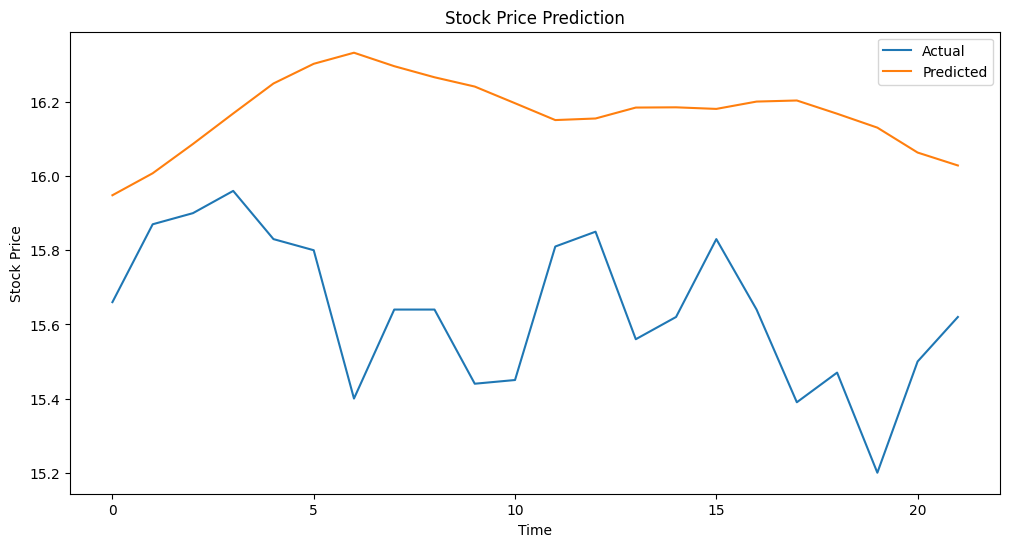

In [14]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the predicted and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'].values[200+time_steps:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()